In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
# Initialize RandomForest Model & Scaler
model = RandomForestClassifier(n_estimators=100, random_state=42)
scaler = StandardScaler()

# Generate synthetic dataset
np.random.seed(42)
num_samples = 1000
dates = pd.date_range(start='2024-01-01', periods=num_samples, freq='H')

data = {
    'timestamp': dates,
    'power_consumption': np.random.normal(1500, 300, num_samples),
    'temperature': np.random.normal(20, 10, num_samples),
    'humidity': np.random.normal(70, 10, num_samples),
    'equipment_age_days': np.random.uniform(0, 3650, num_samples),
    'operational_hours': np.random.uniform(0, 24, num_samples),
    'load_capacity_percentage': np.random.uniform(20, 100, num_samples),
    'voltage_variation': np.random.normal(0, 0.05, num_samples),
    'power_factor': np.random.uniform(0.8, 1.0, num_samples),
    'vibration_level': np.random.normal(2, 0.5, num_samples),
    'number_of_ships_berthed': np.random.randint(0, 5, num_samples)
}

df = pd.DataFrame(data)

# Define maintenance condition
df['maintenance_needed'] = (
    ((df['power_consumption'] > 2000) & (df['equipment_age_days'] > 1825)) |
    (df['power_factor'] < 0.85) |
    ((df['vibration_level'] > 2.5) & (df['load_capacity_percentage'] > 90)) |
    (abs(df['voltage_variation']) > 0.08) |
    (df['equipment_age_days'] > 3000) |
    ((df['operational_hours'] > 20) & (df['load_capacity_percentage'] > 85))
).astype(int)

# Feature Engineering
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

/var/folders/d5/m856t4gd4vq7r_gyzw2htq4m0000gn/T/ipykernel_3065/941398879.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2024-01-01', periods=num_samples, freq='H')


In [3]:
# Define features and target
feature_columns = [
    'power_consumption', 'temperature', 'humidity', 'equipment_age_days',
    'operational_hours', 'load_capacity_percentage', 'voltage_variation',
    'power_factor', 'vibration_level', 'number_of_ships_berthed',
    'hour', 'day_of_week', 'month'
]
X = df[feature_columns]
y = df['maintenance_needed']

# Scaling features
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Predictions & Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       115
           1       0.97      0.98      0.97        85

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



/var/folders/d5/m856t4gd4vq7r_gyzw2htq4m0000gn/T/ipykernel_3065/2760043548.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')


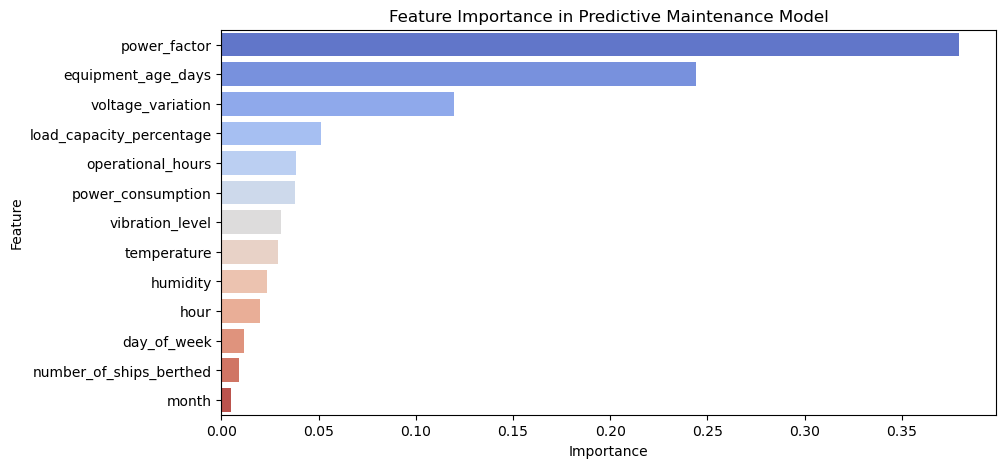

In [4]:
# Feature Importance Visualization
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')
plt.title("Feature Importance in Predictive Maintenance Model")
plt.show()

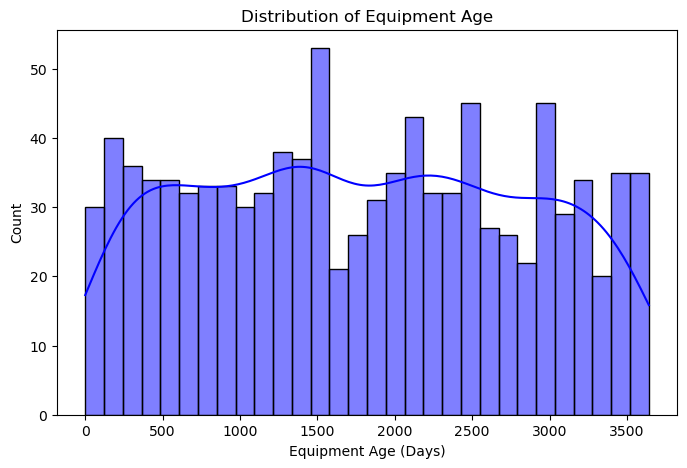

In [6]:
# Histogram: Equipment Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['equipment_age_days'], bins=30, kde=True, color='blue')
plt.title("Distribution of Equipment Age")
plt.xlabel("Equipment Age (Days)")
plt.ylabel("Count")
plt.show()

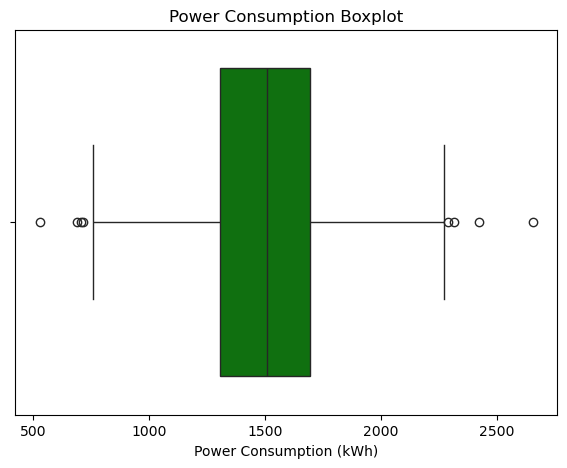

In [10]:
# Boxplot: Power Consumption Analysis
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['power_consumption'], color='green')
plt.title("Power Consumption Boxplot")
plt.xlabel("Power Consumption (kWh)")
plt.show()

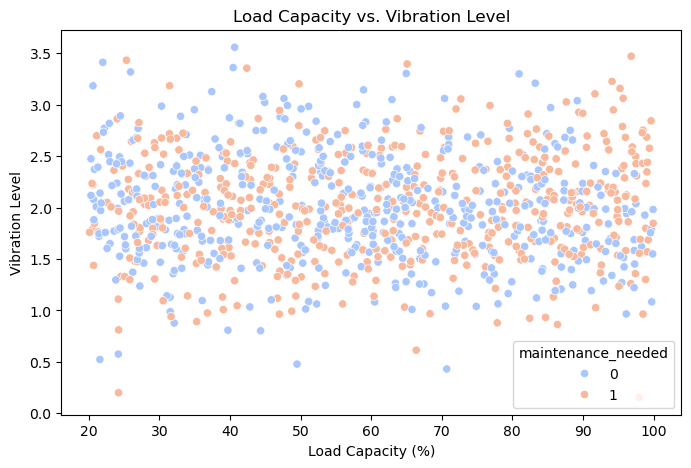

In [13]:
# Scatter Plot: Load Capacity vs. Vibration Level
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['load_capacity_percentage'], y=df['vibration_level'], hue=df['maintenance_needed'], palette='coolwarm')
plt.title("Load Capacity vs. Vibration Level")
plt.xlabel("Load Capacity (%)")
plt.ylabel("Vibration Level")
plt.show()

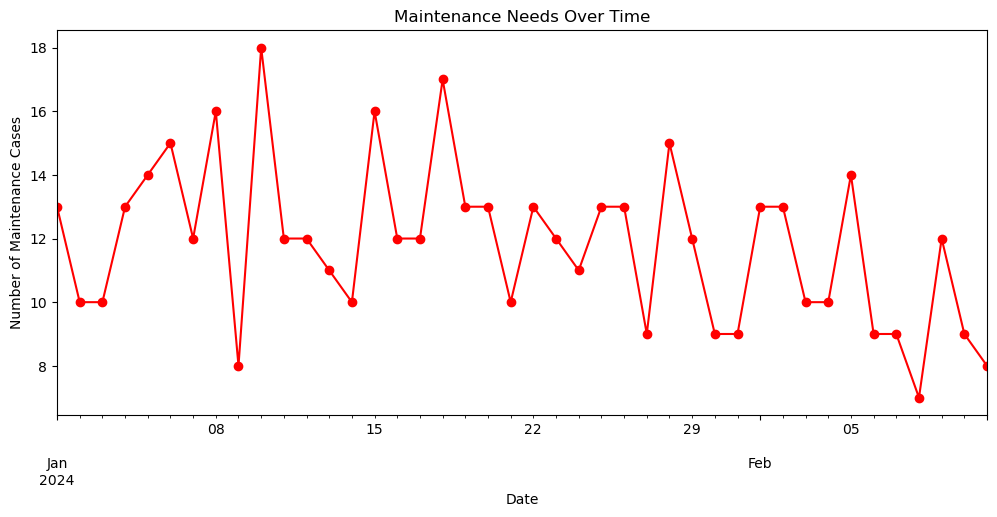

In [15]:
# Time Series Plot: Maintenance Needs Over Time
plt.figure(figsize=(12, 5))
df.set_index('timestamp')['maintenance_needed'].resample('D').sum().plot(marker='o', linestyle='-', color='red')
plt.title("Maintenance Needs Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Maintenance Cases")
plt.show()